In [1]:
print(__import__('sys').version)

import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('yolov7-w6-pose.pt', map_location=device)
model = weigths['model']
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

In [3]:
image = cv2.imread('./person.jpg')
image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))

if torch.cuda.is_available():
    image = image.half().to(device)   
output, _ = model(image)

4 [torch.Size([1, 64, 240, 240]), torch.Size([1, 64, 240, 240]), torch.Size([1, 64, 240, 240]), torch.Size([1, 64, 240, 240])]
1
4 [torch.Size([1, 128, 120, 120]), torch.Size([1, 128, 120, 120]), torch.Size([1, 128, 120, 120]), torch.Size([1, 128, 120, 120])]
1
4 [torch.Size([1, 256, 60, 60]), torch.Size([1, 256, 60, 60]), torch.Size([1, 256, 60, 60]), torch.Size([1, 256, 60, 60])]
1
4 [torch.Size([1, 384, 30, 30]), torch.Size([1, 384, 30, 30]), torch.Size([1, 384, 30, 30]), torch.Size([1, 384, 30, 30])]
1
4 [torch.Size([1, 512, 15, 15]), torch.Size([1, 512, 15, 15]), torch.Size([1, 512, 15, 15]), torch.Size([1, 512, 15, 15])]
1
2 [torch.Size([1, 384, 30, 30]), torch.Size([1, 384, 30, 30])]
1
6 [torch.Size([1, 192, 30, 30]), torch.Size([1, 192, 30, 30]), torch.Size([1, 192, 30, 30]), torch.Size([1, 192, 30, 30]), torch.Size([1, 384, 30, 30]), torch.Size([1, 384, 30, 30])]
1
2 [torch.Size([1, 256, 60, 60]), torch.Size([1, 256, 60, 60])]
1
6 [torch.Size([1, 128, 60, 60]), torch.Size([1, 

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)

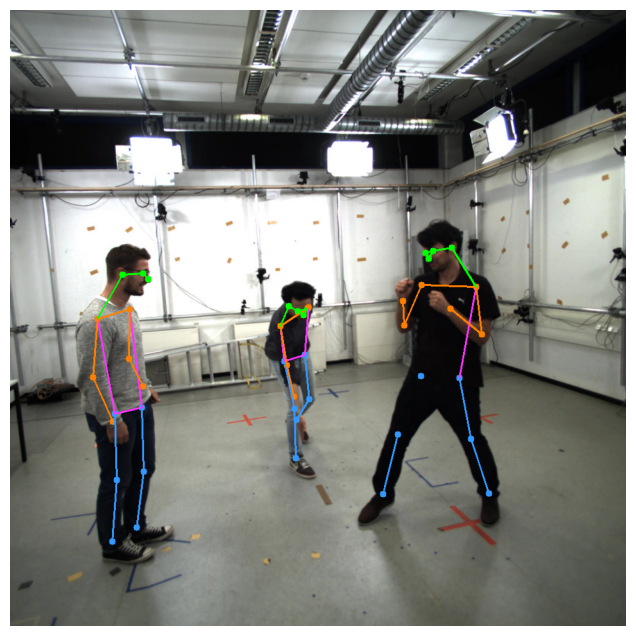

In [5]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()

In [6]:
output

array([[          0,           0,      179.32,      613.96,      158.02,      496.62,     0.94627,      215.25,      419.85,     0.97953,      214.48,      409.33,     0.22829,      207.89,      410.09,     0.99205,      186.42,      412.09,    0.010221,      175.83,      412.12,     0.96108,      186.35,
             466.96,     0.93478,      136.24,      481.41,     0.98601,      185.41,      543.02,     0.53894,      129.76,      572.59,     0.97031,      207.96,      586.97,     0.50704,      160.81,      641.05,     0.94646,      205.11,      619.49,     0.97143,      163.85,      629.13,     0.98746,
             208.59,      719.25,     0.96626,      166.28,      732.42,     0.98722,      197.29,      806.18,     0.94097,      159.76,      828.25,     0.96843],
       [          0,           0,      653.66,       567.6,      228.08,      481.18,     0.94346,      652.55,         387,     0.99337,      659.92,      375.97,     0.99554,      647.03,      378.36,     0.82583,      

51
[     215.25      419.85     0.97953      214.48      409.33     0.22829      207.89      410.09     0.99205      186.42      412.09    0.010221      175.83      412.12     0.96108      186.35      466.96     0.93478      136.24      481.41     0.98601      185.41      543.02     0.53894      129.76      572.59
     0.97031      207.96      586.97     0.50704      160.81      641.05     0.94646      205.11      619.49     0.97143      163.85      629.13     0.98746      208.59      719.25     0.96626      166.28      732.42     0.98722      197.29      806.18     0.94097      159.76      828.25     0.96843]
[(214.47927856445312, 409.32763671875), (659.9160766601562, 375.96807861328125), (463.2422180175781, 465.6274719238281)]


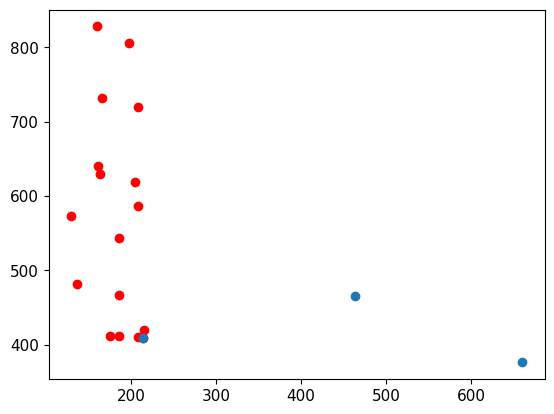

In [7]:
a = output[0, 7:].T
print(len(a))
print(a)
plt.scatter([a[3*i] for i in range(17)], [a[3*i+1] for i in range(17)], color='red')
hbs = [(data[10], data[11]) for data in output]
print(hbs)
plt.scatter(*zip(*hbs))
plt.show()

In [8]:
device

device(type='cpu')

In [ ]:
import time
from utils.plots import output_to_keypoint, plot_skeleton_kpts, colors, plot_one_box_kpt

filepath = "data_new/EhtT5IJRSTE_(313.82-314.65-315.6)_train.mp4"  # "rne/XvDNH2b3QZQ_(400.67-401.33-402.1)_4_train.mp4"
names = model.module.names if hasattr(model, 'module') else model.names  # get class names

cap = cv2.VideoCapture(filepath)

if cap.isOpened() == False:
    raise TypeError("Error opening video stream or file")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out_filename = f"{'.'.join(filepath.split('.')[:-1])}_annotated.{filepath.split('.')[-1]}"
out = cv2.VideoWriter(out_filename, cv2.VideoWriter_fourcc(
    'M', 'J', 'P', 'G'), 10, (frame_width, frame_height))

print(out_filename, frame_width, frame_height)

total_fps = 0
frame_count = 0
time_list = []   #list to store time
fps_list = []    #list to store fps
view_img = True

outputList = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    """
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = pose.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    print(results.pose_landmarks)
    """

    # frame = frame.resize((640, 360))
    orig_image = frame #store frame
    image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB) #convert frame to RGB
    image = letterbox(image, (frame_width), stride=64, auto=True)[0]
    image = cv2.resize(image, (1920, 1088))
    image_ = image.copy()
    image = transforms.ToTensor()(image)
    image = torch.tensor(np.array([image.numpy()]))
    
    # image = image.to(device)  #convert image data to device
    # image = image.float() #convert image to float precision (cpu)
    if torch.cuda.is_available():
        image = image.half().to(device)  
    start_time = time.time() #start time for fps calculation
    
    with torch.no_grad():  #get predictions
        # print(image)
        print('image.shape:', image.shape)
        output_data, _ = model(image) # problem
        
    output_data = non_max_suppression_kpt(output_data,   #Apply non max suppression
                                            0.25,   # Conf. Threshold.
                                            0.65, # IoU Threshold.
                                            nc=model.yaml['nc'], # Number of classes.
                                            nkpt=model.yaml['nkpt'], # Number of keypoints.
                                            kpt_label=True)
    
    output = output_to_keypoint(output_data)
    outputList.append(output)
    
    im0 = image[0].permute(1, 2, 0) * 255 # Change format [b, c, h, w] to [h, w, c] for displaying the image.
    im0 = im0.cpu().numpy().astype(np.uint8)

    im0 = cv2.cvtColor(im0, cv2.COLOR_RGB2BGR) #reshape image format to (BGR)
    gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh

    for i, pose in enumerate(output_data):  # detections per image
        if len(output_data):  #check if no pose
            for c in pose[:, 5].unique(): # Print results
                n = (pose[:, 5] == c).sum()  # detections per class
                print("No of Objects in Current Frame : {}".format(n))
                        
            for det_index, (*xyxy, conf, cls) in enumerate(reversed(pose[:,:6])): #loop over poses for drawing on frame
                c = int(cls)  # integer class
                kpts = pose[det_index, 6:]
                label = f'{names[c]} {conf:.2f}'
                plot_one_box_kpt(xyxy, im0, label=label, color=colors(c, True), 
                                        line_thickness=3,kpt_label=True, kpts=kpts, steps=3, 
                                        orig_shape=im0.shape[:2])

    end_time = time.time()  #Calculatio for FPS
    fps = 1 / (end_time - start_time)
    total_fps += fps
    frame_count += 1
                
    fps_list.append(total_fps) #append FPS in list
    time_list.append(end_time - start_time) #append time in list

    # Stream results
    if view_img:
        cv2.imshow("YOLOv7 Pose Estimation Demo", im0)
        cv2.waitKey(1)  # 1 millisecond

    out.write(im0)  #writing the video frame
# pose.close()
cap.release()
out.release()


In [10]:
len(outputList)

23

In [11]:
human_count = max({output.shape[0] for output in outputList})
human_count

4

0
1
2
0
1
2
0
1
0
1
2
0
1
2
0
1
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
3
0
1
2
3
0
1
2
0
1
2
3
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


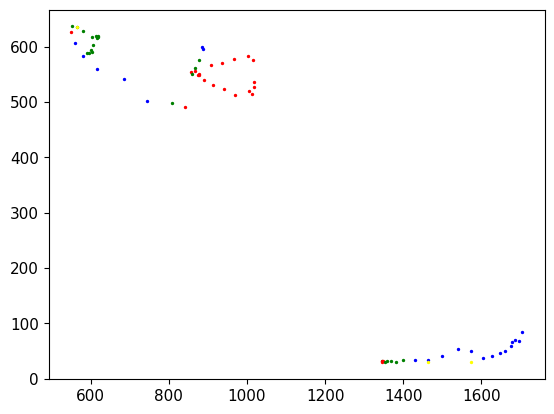

In [12]:
for output in outputList:
    for i, data in enumerate(output):
        # print(i)
        color = ['red', 'green', 'blue', 'yellow', 'white', 'pink', '#4f81c5', '#'][i]
        plt.scatter(data[10], data[11], color=color, s=2)

In [13]:
H36M_NAMES = ['']*32
H36M_NAMES[0]  = 'Hip'
H36M_NAMES[1]  = 'RHip'
H36M_NAMES[2]  = 'RKnee'
H36M_NAMES[3]  = 'RFoot'
H36M_NAMES[6]  = 'LHip'
H36M_NAMES[7]  = 'LKnee'
H36M_NAMES[8]  = 'LFoot'
H36M_NAMES[12] = 'Spine'
H36M_NAMES[13] = 'Thorax'
H36M_NAMES[14] = 'Neck/Nose'
H36M_NAMES[15] = 'Head'
H36M_NAMES[17] = 'LShoulder'
H36M_NAMES[18] = 'LElbow'
H36M_NAMES[19] = 'LWrist'
H36M_NAMES[25] = 'RShoulder'
H36M_NAMES[26] = 'RElbow'
H36M_NAMES[27] = 'RWrist'

h36m_coco_map = {0: 10, 1: 9, 2: 11, 5: 15, 6: 12, 7: 16, 8: 13, 9: 17, 10: 14, 11: 2, 12: 5, 13: 3, 14: 6, 15: 4, 16: 7}

def coco2h36m(coco_output):
    a = coco_output[7:].T
    coco_coords = [(a[3*i], a[3*i+1]) for i in range(17)]
    h36m_coords = {h36m_coco_map[i]: coco_coords[i] for i in h36m_coco_map}
    # print(h36m_coords)
    h36m_coords[1] = ((h36m_coords[2][0] + h36m_coords[5][0]) / 2, (h36m_coords[2][1] + h36m_coords[5][1]) / 2)
    h36m_coords[8] = ((h36m_coords[1][0] + h36m_coords[9][0]) / 2, (h36m_coords[1][1] + h36m_coords[9][1]) / 2)
    return h36m_coords

h36m_coords_list = [[] for i in range(human_count)]
for output in outputList:
    for i, coco_data in enumerate(output):
        h36m_coords_list[i].append(coco2h36m(coco_data))

print([np.array(h36m_coords_list[i]).shape for i in range(human_count)])

[(23,), (23,), (21,), (3,)]
